In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('data.xlsx', skiprows=2)  # Adjust the number of skiprows as needed

features = [
    'Year',
    'Total_Population',
    'Population_Increase_Total',
    'Total_Male_Population',
    'Male_Population_Increase',
    'Total_Female_Population',
    'Female_Population_Increase',
    'Population_15-19',
    'Population_20-24',
    'Population_25-29',
    'Population_30-34',
    'Population_35-39',
    'Population_40-44',
    'Population_45-49',
    'Total_Deaths',
    'Deaths_Males',
    'Deaths_Females',
    'Crude_Death_Rate_Per_Mille',
    'Death',
    'Mean population',
    'Total_Infant_Mortality_Per_Mille',
    'Infant_Deaths',
    'Male_Infant_Mortality_Per_Mille',
    'Male_Infant_Deaths',
    'Female_Infant_Mortality_Per_Mille',
    'Female_Infant_Deaths',
    'Live_Births_Total',
    'Live_Births_Males',
    'Live_Births_Females',
    'Total_Fertility_Rate',
    'Intermunicipal_Migration',
    'Immigration_to_Finland',
    'Emigration_from_Finland',
    'Net_Migration',
    'Marriages',
    'Divorces',
]

data.columns = features

print(data.tail())
features.remove('Total_Fertility_Rate')
features.remove('Year')


    Year  Total_Population  Population_Increase_Total  Total_Male_Population  \
73  2018           5517919                       4789                2723290   
74  2019           5525292                       7373                2728262   
75  2020           5533793                       8501                2733808   
76  2021           5548241                      14448                2743101   
77  2022           5563970                      15729                2753477   

    Male_Population_Increase  Total_Female_Population  \
73                      4159                  2794629   
74                      4972                  2797030   
75                      5546                  2799985   
76                      9293                  2805140   
77                     10376                  2810493   

    Female_Population_Increase  Population_15-19  Population_20-24  \
73                         630            144041            155877   
74                        2401      

In [8]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


forecasted_data = pd.DataFrame()
forecasted_data['Year'] = pd.date_range(start=pd.Timestamp(data['Year'].iloc[-1], 1, 1) + pd.DateOffset(years=1), periods=8, freq='Y')
print(forecasted_data['Year'])
best_models = {}  # Store the best model's parameters for each feature

for feature in features:
    stepwise_fit = auto_arima(data[feature], start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                              seasonal=True, d=None, D=1, trace=True, error_action='ignore', 
                              suppress_warnings=True, stepwise=True, information_criterion='aic')
    
    p, d, q = stepwise_fit.order
    P, D, Q, m = stepwise_fit.seasonal_order

    # Store best model parameters
    best_models[feature] = {
        'p': p, 'd': d, 'q': q,
        'P': P, 'D': D, 'Q': Q, 'm': m,
        'aic': stepwise_fit.aic()
    }

    model = SARIMAX(data[feature], order=(p, d, q), seasonal_order=(P, D, Q, m))
    result = model.fit()
    forecast = result.forecast(steps=8)
    
    forecasted_data[feature] = forecast.values

for feature, model_params in best_models.items():
    print(f"Best SARIMA Model for {feature}: (p,d,q) = ({model_params['p']},{model_params['d']},{model_params['q']}) and (P,D,Q,m) = ({model_params['P']},{model_params['D']},{model_params['Q']},{model_params['m']}), AIC = {model_params['aic']}")


0   2023-12-31
1   2024-12-31
2   2025-12-31
3   2026-12-31
4   2027-12-31
5   2028-12-31
6   2029-12-31
7   2030-12-31
Name: Year, dtype: datetime64[ns]
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=1387.192, Time=0.33 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=1386.021, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=1386.210, Time=0.05 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=1386.291, Time=0.05 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=1388.539, Time=0.03 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=1625.364, Time=0.08 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=1653.534, Time=0.23 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=1387.750, Time=0.02 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=1387.756, Time=0.05 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=1389.744, Time=0.05 sec
 ARIMA(0,2,0)(0,1,0)[12] intercept   : AIC=1387.978, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,1,0)[12]          
Total fit time: 0.

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1312.019, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1390.451, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1334.489, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1393.965, Time=0.01 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1325.178, Time=0.07 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=1310.550, Time=0.35 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1312.829, Time=0.22 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1320.208, Time=0.27 sec
 ARIMA(2,0,1)(2,1,1)[12] intercept   : AIC=1311.539, Time=0.66 sec
 ARIMA(1,0,2)(2,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(2,1,1)[12] 

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1371.290, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1362.936, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1379.973, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1361.304, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1377.084, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1352.197, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1361.755, Time=0.14 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1350.783, Time=0.50 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1348.742, Time=0.28 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1384.912, Time=0.17 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1321.275, Time=0.57 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1346.224, Time=0.30 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1323.321, Time=0.90 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1361.174, Time=0.27 sec
 ARIMA(2,1,1)(2,1,0

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=64.835, Time=0.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=184.454, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=64.115, Time=0.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=135.875, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=183.273, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=69.893, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=63.372, Time=0.55 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=63.339, Time=0.35 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=62.781, Time=0.60 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=171.610, Time=0.28 sec
 ARIMA(2,0,0)(0,1,2)[12] intercept   : AIC=63.482, Time=0.71 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=64.133, T

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1273.845, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1267.122, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1256.974, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1292.710, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1270.971, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1258.349, Time=0.20 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1258.537, Time=0.20 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1257.857, Time=0.06 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1259.901, Time=0.36 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1264.689, Time=0.05 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1262.650, Time=0.40 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=1258.390, Time=0.10 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1266.212, Time=0.27 sec
 ARIMA(1,0,2)(0,1,1)[12]

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=872.710, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=858.948, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=865.469, Time=0.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=857.630, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=859.018, Time=0.10 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=860.903, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=858.179, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=859.052, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=864.170, Time=0.04 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=855.983, Time=0.19 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=857.677, Time=0.32 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=857.709, Time=0.49 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(3,1,1)(0,1,0)[12]             : AI

In [9]:

print(forecasted_data)


        Year  Total_Population  Population_Increase_Total  \
0 2023-12-31         5581841.0               16638.865957   
1 2024-12-31         5599128.0               17707.001136   
2 2025-12-31         5615604.0               19135.647881   
3 2026-12-31         5627967.0               18976.503246   
4 2027-12-31         5635402.0               19745.442803   
5 2028-12-31         5643271.0               18110.311868   
6 2029-12-31         5644984.0               16270.206043   
7 2030-12-31         5641653.0               16516.670668   

   Total_Male_Population  Male_Population_Increase  Total_Female_Population  \
0           2.764615e+06               9530.850326             2.821948e+06   
1           2.775734e+06               9777.992432             2.832912e+06   
2           2.786516e+06              10637.004191             2.843433e+06   
3           2.795073e+06              11323.105350             2.852157e+06   
4           2.801776e+06              12625.728889     

In [10]:
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data_copy = data.copy()
forecasted_data_copy = forecasted_data.copy()

data_copy.drop(['Year', 'Total_Fertility_Rate'], axis=1, inplace=True)

X = data_copy  # All columns except 'Year' and 'Total_Fertility_Rate'
y = data['Total_Fertility_Rate']  # Target variable

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge.fit(X_train, y_train)
ridge_preds_val = ridge.predict(X_val)

ridge_mse = mean_squared_error(y_val, ridge_preds_val)
print(f"Validation MSE for Ridge Regression: {ridge_mse}")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds_val = rf.predict(X_val)

rf_mse = mean_squared_error(y_val, rf_preds_val)
print(f"Validation MSE for Random Forest: {rf_mse}")

if rf_mse < ridge_mse:
    forecasted_fertility = rf.predict(forecasted_data_copy.drop('Year', axis=1))  # Keep 'Year' column
    print("Random Forest was chosen for forecasting.")
else:
    forecasted_fertility = ridge.predict(forecasted_data_copy.drop('Year', axis=1))  # Keep 'Year' column
    print("Ridge Regression was chosen for forecasting.")

forecasted_data['Total_Fertility_Rate'] = forecasted_fertility
print(forecasted_data[['Year', 'Total_Fertility_Rate']])


Validation MSE for Ridge Regression: 0.0002059562948514733
Validation MSE for Random Forest: 0.0038922524999999318
Ridge Regression was chosen for forecasting.
        Year  Total_Fertility_Rate
0 2023-12-31              1.228252
1 2024-12-31              1.215298
2 2025-12-31              1.160967
3 2026-12-31              1.131474
4 2027-12-31              1.074382
5 2028-12-31              0.990060
6 2029-12-31              0.918084
7 2030-12-31              0.842618


In [11]:
print(data)
print(data['Total_Fertility_Rate'])

    Year  Total_Population  Population_Increase_Total  Total_Male_Population  \
0   1945           3778890                      41794                1800729   
1   1946           3833072                      54182                1826822   
2   1947           3885284                      52212                1852447   
3   1948           3937840                      52556                1878711   
4   1949           3987996                      50156                1904733   
..   ...               ...                        ...                    ...   
73  2018           5517919                       4789                2723290   
74  2019           5525292                       7373                2728262   
75  2020           5533793                       8501                2733808   
76  2021           5548241                      14448                2743101   
77  2022           5563970                      15729                2753477   

    Male_Population_Increase  Total_Fem

In [12]:
print(data.columns)
print(forecasted_data.columns)


Index(['Year', 'Total_Population', 'Population_Increase_Total',
       'Total_Male_Population', 'Male_Population_Increase',
       'Total_Female_Population', 'Female_Population_Increase',
       'Population_15-19', 'Population_20-24', 'Population_25-29',
       'Population_30-34', 'Population_35-39', 'Population_40-44',
       'Population_45-49', 'Total_Deaths', 'Deaths_Males', 'Deaths_Females',
       'Crude_Death_Rate_Per_Mille', 'Death', 'Mean population',
       'Total_Infant_Mortality_Per_Mille', 'Infant_Deaths',
       'Male_Infant_Mortality_Per_Mille', 'Male_Infant_Deaths',
       'Female_Infant_Mortality_Per_Mille', 'Female_Infant_Deaths',
       'Live_Births_Total', 'Live_Births_Males', 'Live_Births_Females',
       'Total_Fertility_Rate', 'Intermunicipal_Migration',
       'Immigration_to_Finland', 'Emigration_from_Finland', 'Net_Migration',
       'Marriages', 'Divorces'],
      dtype='object')
Index(['Year', 'Total_Population', 'Population_Increase_Total',
       'Total_Mal

In [13]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
forecasted_data['Year'] = pd.to_datetime(forecasted_data['Year'], format='%Y')

print(data)

         Year  Total_Population  Population_Increase_Total  \
0  1945-01-01           3778890                      41794   
1  1946-01-01           3833072                      54182   
2  1947-01-01           3885284                      52212   
3  1948-01-01           3937840                      52556   
4  1949-01-01           3987996                      50156   
..        ...               ...                        ...   
73 2018-01-01           5517919                       4789   
74 2019-01-01           5525292                       7373   
75 2020-01-01           5533793                       8501   
76 2021-01-01           5548241                      14448   
77 2022-01-01           5563970                      15729   

    Total_Male_Population  Male_Population_Increase  Total_Female_Population  \
0                 1800729                     19813                  1978161   
1                 1826822                     26093                  2006250   
2              

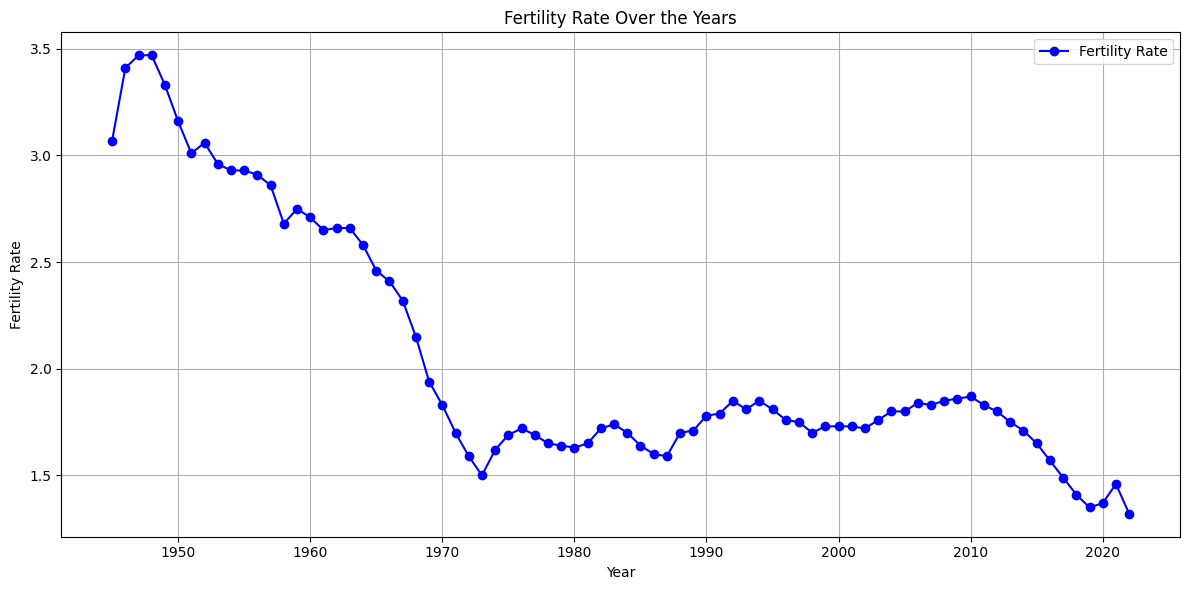

In [14]:
data.sort_values(by='Year', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Total_Fertility_Rate'], label='Fertility Rate', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate Over the Years')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()



In [15]:
data_selected_columns = data[['Year', 'Total_Fertility_Rate']]
forecasted_selected_columns = forecasted_data[['Year', 'Total_Fertility_Rate']]

data_selected_columns.columns = ['Year', 'Fertility Rate']
forecasted_selected_columns.columns = ['Year', 'Fertility Rate']
print(data_selected_columns,forecasted_selected_columns)



         Year  Fertility Rate
0  1945-01-01            3.07
1  1946-01-01            3.41
2  1947-01-01            3.47
3  1948-01-01            3.47
4  1949-01-01            3.33
..        ...             ...
73 2018-01-01            1.41
74 2019-01-01            1.35
75 2020-01-01            1.37
76 2021-01-01            1.46
77 2022-01-01            1.32

[78 rows x 2 columns]         Year  Fertility Rate
0 2023-12-31        1.228252
1 2024-12-31        1.215298
2 2025-12-31        1.160967
3 2026-12-31        1.131474
4 2027-12-31        1.074382
5 2028-12-31        0.990060
6 2029-12-31        0.918084
7 2030-12-31        0.842618


In [16]:
combined_data = pd.concat([data_selected_columns, forecasted_selected_columns])
print(combined_data)

         Year  Fertility Rate
0  1945-01-01        3.070000
1  1946-01-01        3.410000
2  1947-01-01        3.470000
3  1948-01-01        3.470000
4  1949-01-01        3.330000
..        ...             ...
3  2026-12-31        1.131474
4  2027-12-31        1.074382
5  2028-12-31        0.990060
6  2029-12-31        0.918084
7  2030-12-31        0.842618

[86 rows x 2 columns]


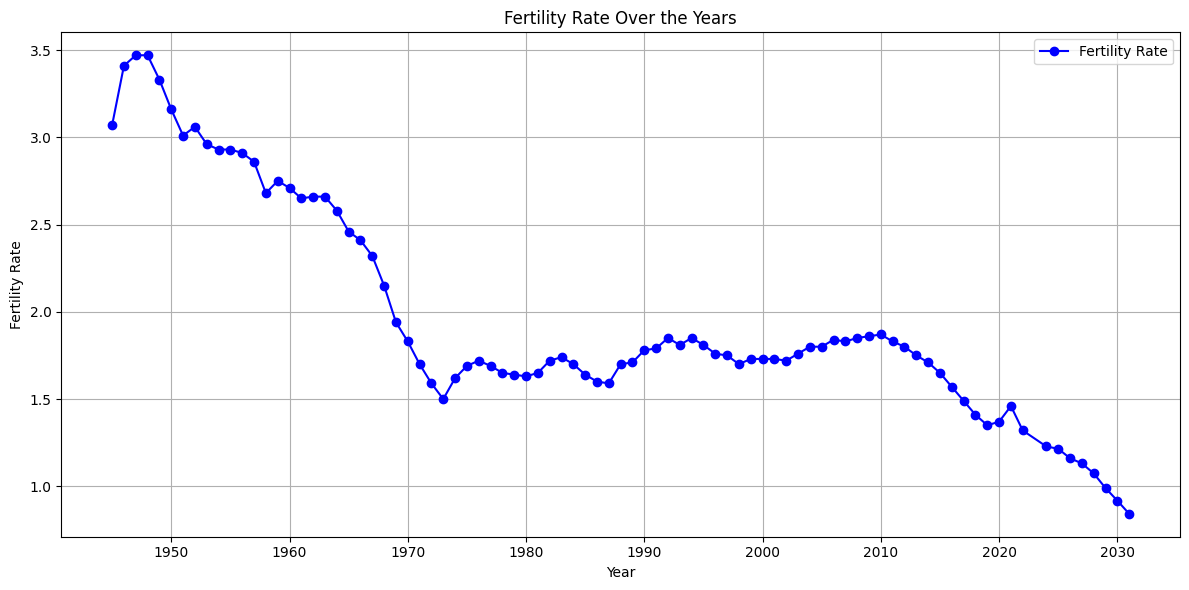

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data['Year'], combined_data['Fertility Rate'], label='Fertility Rate', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate Over the Years')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()